In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm as tqdmflat

import spacy
from spacy.lang.en import English
import os

from simpletransformers.classification import ClassificationModel

import logging


In [2]:
PATH = 'data/'
biz=pd.read_csv(os.path.join(PATH,"yelp_business.csv"))
reviews=pd.read_csv(os.path.join(PATH,"yelp_review.csv"))

In [3]:


col = ['neighborhood', 'address', 'latitude', 'longitude', 'stars']
biz.drop(columns=col, inplace=True)    

biz.categories = biz.categories.apply(lambda x: x.split(";"))

biz = biz[
    (biz.city == 'Cleveland') & 
    (biz.state == 'OH') & 
    (biz.is_open == 1) & 
    (biz.categories.apply(
        lambda x: True if 'Restaurants' in x else False
    ))]



In [4]:
df = pd.merge(reviews, biz, how='inner', on='business_id')

In [5]:
df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,city,state,postal_code,review_count,is_open,categories
0,OPZsR2jCG72uoDNjU71DQQ,qYbWTWH5leltA0bzWAOnmA,meXjqyhTNLFmknY39y2sMg,5,2014-09-11,Solid beers -- Christmas Ale defines my holida...,1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
1,fxGwEiSYDtAen8BNuVGGxg,8Az_JgEpXqAii_5EDkw2tw,meXjqyhTNLFmknY39y2sMg,3,2013-10-13,Meh. It was OK. A bartender the night before...,0,1,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
2,Gweb4pADeQ26WnaiKEZ7GQ,T9tEic49JZjN4nCUcDvrRQ,meXjqyhTNLFmknY39y2sMg,4,2014-01-15,"Oh Christmas Ale, oh Christmas Ale, how lovely...",1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
3,P1vhwPI56SeZEz10ywaS7w,W1p8_CFW5FISSihmQo5Qzw,meXjqyhTNLFmknY39y2sMg,3,2012-02-09,What is the big deal about this place? The foo...,2,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
4,1kQvQlBX0V5_rGddBh9-rQ,Y_PP05RRdzbKRYfDCCfh8w,meXjqyhTNLFmknY39y2sMg,5,2017-04-30,Great Lakes Brewing Company is one of my favor...,0,0,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56905,0vzkpZuQKms6FW8VoJwwGA,pCeiu_FRmS_F_UNGfqiikg,xJfM3UbnaQkLPEMZgLNuyQ,3,2017-11-09,This Wendy's in the past was deserving of one ...,0,0,0,"""Wendy's""",Cleveland,OH,44105,3,1,"[Restaurants, Burgers, Fast Food]"
56906,dUHdSKwCkU-pIuTGJBqt7A,aw2m9p2dPo5OXIx4pQGUPg,xJfM3UbnaQkLPEMZgLNuyQ,4,2016-10-20,I went to get a taco salad because I heard so ...,0,0,0,"""Wendy's""",Cleveland,OH,44105,3,1,"[Restaurants, Burgers, Fast Food]"
56907,CMTHLl4s03tES0Nfskuspg,ORceu2UCCWxyRzvoElYotw,4_sXnBAHU3lGxVfPUn0CNQ,1,2017-02-13,I can't call Number 1 Kitchen the worst Chines...,0,0,0,"""Number 1 Kitchen""",Cleveland,OH,44111,3,1,"[Chinese, Restaurants]"
56908,IP1_iBoZ9fb3Rp5WqS8uAw,bOFmXLfqyLYbvuo_52bdgQ,4_sXnBAHU3lGxVfPUn0CNQ,1,2017-03-23,My family and I have been ordering food from h...,0,0,0,"""Number 1 Kitchen""",Cleveland,OH,44111,3,1,"[Chinese, Restaurants]"


In [6]:
from tokenizers import BertWordPieceTokenizer



In [6]:
df_polar = df[df.stars.isin([1,5])]
df_polar = df_polar[['text', 'stars']]

In [7]:
df_polar = df_polar.sample(2000,weights=1/df_polar.stars)

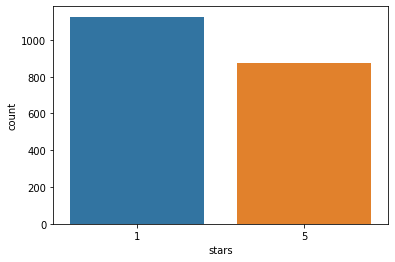

In [8]:
sns.countplot(df_polar.stars);

In [9]:
df_polar

,text,stars
23955,If you love great food and excellent service y...,5
23215,I have high standards and if it were up to me ...,5
7104,"Alright, so today I went there and ordered a m...",1
50662,Worst. Service. Ever. We had a reservation an...,1
6094,Won't go back. Very over rated. Food is good b...,1
...,...,...
14484,"I feel more 4-and-a-half stars, but L'Albatros...",5
24426,"Aside from the beautiful setting, lighting, an...",5
42425,"New Pizza spot opened on W25th, and being the ...",5
30436,This is a destination restaurant for hard-core...,5


In [10]:



nlp = English()  # just the language with no model
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer)
doc = nlp.pipe(df_polar.text, n_process=12, batch_size=100)
#col_list = ['sents', 'score']
#df_sents = pd.DataFrame(columns=col_list)
#df_polar['splits'] = list(doc)




In [11]:
df_polar_sents = pd.DataFrame(columns=['sent', 'score', 'og_text'])
for dfp, dc in tqdm(zip(df_polar.iterrows(), doc), total=len(df_polar)):

    for sent in dc.sents:
        strr = dfp[1].stars
        strr = 1 if strr == 5 else 0
        snt = sent.string
        df_temp = pd.Series({'sent': snt, 'score': strr, 'og_text':dfp[1].text })
        df_polar_sents = df_polar_sents.append(df_temp, ignore_index=True)
doc.close()

<ipython-input-11-84ec43a68edf>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for dfp, dc in tqdm(zip(df_polar.iterrows(), doc), total=len(df_polar)):


In [12]:
df_polar_sents['sent'] = df_polar_sents.sent.str.strip()


In [13]:
df_polar_sents

,sent,score,og_text
0,If you love great food and excellent service y...,1,If you love great food and excellent service y...
1,This was our first time at Crop and we had hea...,1,If you love great food and excellent service y...
2,The Braised Short Ribs over Barley was outstan...,1,If you love great food and excellent service y...
3,Having just moved from San Francisco SF has no...,1,If you love great food and excellent service y...
4,By the way the redone Bank Building that the r...,1,If you love great food and excellent service y...
...,...,...,...
16516,Try the Cleveland nachos.,1,Love the ambiance of this place! Very crowded ...
16517,You can't go wrong.,1,Love the ambiance of this place! Very crowded ...
16518,"Along with the dates, and spring rolls.",1,Love the ambiance of this place! Very crowded ...
16519,Amazing!,1,Love the ambiance of this place! Very crowded ...


In [14]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(df_polar_sents) #(df_polar_sents)

In [15]:
testdf

,sent,score,og_text
10608,"I'm not sure what our table did, beyond offend...",0,I had a terrible experience at the Hafbrauhaus...
9715,I will here.,0,. Exit the Dragon...
2716,Disgusting.,0,Absolutely appalled. If I could give less than...
12545,"If you eat Fabios, eat at your own risk",0,This was the most disgusting food I have ever ...
4680,She didn't comment at all on our complaint but...,0,My husband and I had dinner here for the first...
...,...,...,...
16452,I had the chicken ceasar salad and the lettuce...,0,Their outdoor patio is not facing the water. ...
12389,Not a place for eating.,0,Yuck. Yuck. And more yuck. Not a place for ...
12005,I've been to many bars that can accomplish hav...,0,I've been to this place a handful of times and...
11344,My last 2 visits to El Jalapeños have been not...,0,My last 2 visits to El Jalapeños have been not...


In [16]:
model_args = {
    "num_train_epochs": 1,
    'reprocess_input_data': True, 
    'overwrite_output_dir': True,
    "fp16": False,
    'regression': True,
    
}

# Create a ClassificationModel
model = ClassificationModel(
    "roberta", "roberta-base", args=model_args,  num_labels=1,
)

In [17]:

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [18]:
model.train_model(traindf[['sent', 'score']])

C:\tools\miniconda3\envs\yelp_trch\lib\site-packages\simpletransformers\classification\classification_model.py:250: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


Running loss: 0.637008

..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


Running loss: 0.203584

C:\tools\miniconda3\envs\yelp_trch\lib\site-packages\torch\optim\lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.023096


C:\tools\miniconda3\envs\yelp_trch\lib\site-packages\torch\optim\lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.


In [21]:
model.predict(('food is so good!',))

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


(array(0.9950654, dtype=float32), array(0.9950654, dtype=float32))

In [20]:
predictions, raw_outputs = model.predict(["I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?" * 25])
print(predictions)
print(raw_outputs)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.



0.10930856
0.10930856


In [23]:
result, model_outputs, wrong_predictions = model.eval_model(testdf)

C:\tools\miniconda3\envs\yelp_trch\lib\site-packages\simpletransformers\classification\classification_model.py:667: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_model:{'eval_loss': 0.09884554179717663}


In [31]:
for i in wrong_predictions:
    print(i.label, i.text_a, i.text_b)

0 I'm not sure what our table did, beyond offend her delicate sensibilities by requesting service from a waitress, but the overall experience was absolutely terrible. None
0 I will here. None
0 Disgusting. None
0 If you eat Fabios, eat at your own risk None
0 She didn't comment at all on our complaint but did go to get s&p and lemon for us. None
0 I went here on election night with a large group of 30+ people to watch returns. None
0 He was obviously too busy parading around a bottle of his favorite wine to various tables to care much about me or the food served in his restaurant. None
1 Put it on your list of must do's. None
0 This is by far one of disgusting things I've seen in my food. None
0 The mash potatoes are fake-in-a-box type, vegetables are frozen. None
0 Love you Sammy! None
1 Amazing Indian food! None
0 Visitors to this restaurant should know to look closely at the charges on their bill. None
0 It tasted completely off. None
0 I included a picture of said burger next to sa

1 I really like the pretzel sticks because they are served with a seriously yummy cinnamon butter. None
0 We arrived and were promptly seated. None
1 Needless to say, I'll be coming back soon. None
1 The food was incredible. None
0 I called at 12am to place an order, a lady answered the phone "Hi we're closed" and then hung up on me! None
0 Walked back but the other customers were already complaining as well,  so I still let it go. None
0 This Subway is horrible!! None
0 Another 20 minutes and it showed up. None
1 We order the pork pierogies and bomber Shrimp. None
0 I was eventually brought another one that tasted equally horrible. None
0 First, I had to specify that outside seating meant outside seating. None
0 We got food to go. None
0 Really!?!? None
0 Our server forgot the bacon. None
1 My friend got the hanger steak. None
1 I was jonesing for some good pizza today and Dina's is my go-to spot for a good pie. None
0 Those drinks turned out to be the only part of the meal that was w

1 The chorizo combo with the chipotle sauce is kick butt. None
0 Called in my order- which took about 10 minutes because the girl kept putting us on hold to talk to someone in the background. None
0 When I got my bill I was amazed to find a charge of $75 for the appetizer I had ordered. None
0 Our other guests got their food but I cancelled our food order after it didn't come out after 75 minutes. None
1 I've ordered subs both times my choice of three meets a cheese and what ever toppings i want. None
1 The second time I went I tried the Asian wrap and it was so good and a really decent size. None
1 With that said, I went here on opening night for dinner with my husband, once by myself for a quick appetizer at the bar and again for dinner with some friends. None
0 No way. None
0 Food was fairly well executed on the first visit but close attention to detail is lacking for the whopping premium we paid for hotel restaurant food. None
0 Stop at denny's because I hadn't eaten since 9am befo

1 Well...sometimes I'm disappointed by my check, but that's more because of me wanting to stay there half the day, not because of value. None
0 I was extremely disappointed. None
0 The lady that came in after me pays and leaves. None
0 5\/8\/16 6:30 pm reservation. None
0 Very inefficient. None
0 The tomatoes look really bad. None
0 It wasn't until I went up to the bar and he took out every kind of saki the restaurant had, that he knew what I was referring to. None
0 The food is so bad my dog refuses to eat it. None
0 Bowling lanes were not available until 30 minutes after our reservation time while lanes adjacent to ours were vacant the entire time we were there. None
0 It gonna be a while before i go there again. None
0 We had tortilla chips and salsa. None
0 and if I could help it making his job easier, I ent out the door and spent my money at AJ Roccos - and will make sure to do it every time I watch a CAVS game in Cleveland. None
1 The design inside with pictures and candles, as w

1 Management is nice. None
0 The manager comes back and says, "you'll probably pay more for the cheesecake than you would for your entree." None
1 Vegan\/vegetarian friendly. None
0 This left us to go to the one open bar, waiting for drinks and wasting time on the bowling we paid for. None
0 He was rude, not customer friendly and really seemed to have cared less! None
0 Came for a sold out, double concert and this fool acted like paying customers were the enemy! None
0 Wahlbergers stick to acting and quit ripping off the public! None
1 The arroz con pollo actually comes with the cheese sauce drizzled over it. None
0 There are much better places downtown to go to if you are looking for good Mexican food. None
1 Trust me. None
1 My husband had the Salisbury steak, I was allowed to taste it, just as amazing! None
0 Not even an apology. None
0 After a few bites, no thanks. None
1 We did tacos & tostadas- fish was was light but flavorful, marinated grilled chicken was moist and tasty, but t

0 Unfortunately I was not old enough to drink then. None
1 Seriously. None
1 Loved this restaurant! None
1 I recommend the Jambalaya and Gumbo. None
0 Perhaps years of working in the service industry has given me high expectations, but when you choose to dine at one restaurant over another, you expect the best. None
1 I ordered a burger which came with seasoned fries (can't remember the name, I just remember there being two on the menu). None
1 Come here hungry, you'll need all of your appetite. None
1 I Love their Gyros. None
0 Maybe the health department should get after them. None
1 All said and done the bill was high, but also because we were drinking. None
1 Their sauce is unrivaled. None
0 Still, the bartender saw our table was spending $200 in their near empty establishment and offered to help us out. None
0 I should have taken that negative comment as foreshadowing, but I brushed it off and continued to be excited about my food. None
0 What a shame! None
0 He also asked them to

In [34]:
model.predict(testdf.sent)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


(array([0.01449317, 0.8479248 , 0.04529252, ..., 0.21926661, 0.04952847,
        0.02976467], dtype=float32),
 array([0.01449317, 0.8479248 , 0.04529252, ..., 0.21926661, 0.04952847,
        0.02976467], dtype=float32))